In [35]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [36]:
accuracies = []
y_pred_probas = []

def predict(year):
    df_past_1 = pd.read_csv(f'./match_data_yearly/{year-1}.csv')
    df_past_2 = pd.read_csv(f'./match_data_yearly/{year-2}.csv')
    df_past_3 = pd.read_csv(f'./match_data_yearly/{year-3}.csv')
    
    df_past = pd.concat([df_past_3,df_past_2,df_past_1])    
    X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_train = df_past["W/L"].values
    
    df_future = pd.read_csv(f'./match_data_yearly/{year}.csv')
    X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_test = df_future["W/L"].values
    
    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)
    y_pred_probas.append(y_pred_proba) 
   
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
    
    print(len(df_future[df_future["W/L"]==0]),len(df_future[df_future["W/L"]==1]),len(df_future[df_future["W/L"]==2]))
    print(np.sum(y_pred_proba, axis=0))

In [37]:
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

68 142 96
[ 75.43975315 128.3776243  102.18262256]
77 125 104
[ 72.06553554 130.01889228 103.91557218]
75 118 113
[ 77.29694071 122.91515214 105.78790715]
70 117 119
[ 76.2486275 116.9752691 112.7761034]
73 126 107
[ 76.43510157 121.34701212 108.21788631]
69 128 109
[ 76.72590418 118.89961731 110.37447851]
72 128 106
[ 71.36431317 123.19071943 111.4449674 ]
68 118 120
[ 72.8399349  127.92819922 105.23186588]
68 142 96
[ 77.22621988 128.66688905 100.10689107]
77 125 104
[ 71.1890232  129.52103556 105.28994124]
75 118 113
[ 77.46080454 122.47487262 106.06432284]
70 117 119
[ 74.73778457 118.41710289 112.84511254]
73 126 107
[ 76.08182593 121.42556274 108.49261133]
69 128 109
[ 76.03800675 119.9966708  109.96532245]
72 128 106
[ 70.50469832 123.02511567 112.47018601]
68 118 120
[ 73.40369175 128.19556411 104.40074413]
68 142 96
[ 75.50119529 128.83647904 101.66232567]
77 125 104
[ 72.08926733 129.39144794 104.51928473]
75 118 113
[ 77.28526617 122.87941872 105.83531512]
70 117 119
[ 74.10

In [38]:
accuracies

[0.6503267973856209,
 0.6241830065359477,
 0.6078431372549019,
 0.6503267973856209,
 0.6503267973856209,
 0.6176470588235294,
 0.6470588235294118,
 0.5915032679738562,
 0.6470588235294118,
 0.6241830065359477,
 0.6078431372549019,
 0.6568627450980392,
 0.6601307189542484,
 0.6176470588235294,
 0.6372549019607843,
 0.5947712418300654,
 0.6503267973856209,
 0.6241830065359477,
 0.6111111111111112,
 0.6633986928104575,
 0.6470588235294118,
 0.6143790849673203,
 0.6405228758169934,
 0.5947712418300654,
 0.6764705882352942,
 0.630718954248366,
 0.6045751633986928,
 0.6633986928104575,
 0.6568627450980392,
 0.6111111111111112,
 0.630718954248366,
 0.5980392156862745,
 0.6699346405228758,
 0.6274509803921569,
 0.6176470588235294,
 0.6666666666666666,
 0.6405228758169934,
 0.6143790849673203,
 0.6437908496732027,
 0.6045751633986928,
 0.6764705882352942,
 0.6274509803921569,
 0.6045751633986928,
 0.6666666666666666,
 0.6470588235294118,
 0.6111111111111112,
 0.6405228758169934,
 0.604575163398

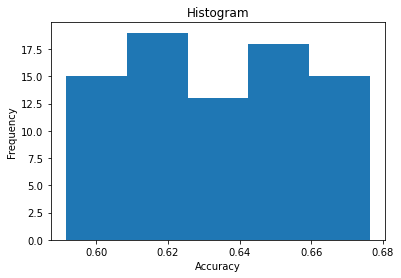

In [39]:
n, bins, patches=plt.hist(accuracies, bins=5)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [40]:
np.mean(accuracies)

0.6335375816993464

### 考察

2013-2020を予測するシーズンとし､そのシーズンの過去3年間を訓練データとした｡
試合時のEloratingと前月との差分を入力データに使い､勝敗予測の精度を出したところ､2013-2020でおよそ60%台前半にぐらいになる